In [1]:
import pandas as pd
from helper import util_pids, util_visualizations # custom functions for pids and visualizations
import numpy as np
import matplotlib.pyplot as plt
import ast

# 1. Subclasses and transitive subclasses

In [2]:
# read in subclasses
subclasses = pd.read_csv('/path/to/9_FINAL/data/matches_pids/subclass_with_pid.csv', sep=";")
del subclasses['Unnamed: 0']
subclasses.head()

,subClass,class,frequency,pidspread,pldspread,id,pids
0,10,decade,2,1,2,108191420,['p3a']
1,abbess,nun,12,7,11,403873869,"['p4p8ap3a', 'p3a', 'p8b', 'p4', 'p8b', 'p27a'..."
2,abbot,person,48,7,32,156276663,"['p4p1', 'p1', 'p1', 'p1', 'p1', 'p8b', 'p3a',..."
3,actuary,statistician,3,2,3,512259817,['p4p8a']
4,activist,person,172,16,101,485263422,"['p4p23dp2p39p1p23ap23bp8ap3ap43', 'p6p8bp3ap4..."


In [3]:
# get shape
subclasses.shape # 1,692 subclasses which is correct

(1692, 7)

In [4]:
# get all unique pids in subclasses without transitive subclasses
unique_pids_subclasses_pure = util_pids.get_all_different_pids(subclasses, 'pids')
len(unique_pids_subclasses_pure)

57

In [5]:
# append number of occurrences as new column to subclasses dataframe
pure_subclasses_with_pids = util_pids.append_pids_to_data(subclasses, unique_pids_subclasses_pure, 'pids')

In [6]:
# get occurrences of pids as dataframe 
occurences_pids_subclasses_pure = util_pids.get_occurence_pids(pure_subclasses_with_pids, 'pids')
occurences_pids_subclasses_pure.sort_values(by='occurrence', ascending=False).head()

,pid,occurrence
53,p8a,1349
0,p1,1142
46,p3a,1098
50,p5,1094
47,p4,818


In [7]:
# read in transitive subclasses
t_subclasses = pd.read_csv('/path/to/9_FINAL/data/matches_pids/transitive-subclass_with_pid.csv', sep=";")
del t_subclasses['Unnamed: 0']
del t_subclasses['Unnamed: 0.1']
t_subclasses.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,131086904,2,place,114,18,90,"['p23dp25p10p12ap8ap20ap8c', 'p8ap8c', 'p8a', ..."
1,131113752,9,place,28,8,25,"['p8ap20a', 'p8ap20a', 'p2', 'p8c', 'p8a', 'p1..."
2,131185728,3,place,83,14,59,"['p4p15ap1p20cp8ap28bp3a', 'p20c', 'p8a', 'p8a..."
3,131393096,6,place,55,11,37,"['p2p1p8ap28b', 'p4', 'p8a', 'p8a', 'p8a', 'p8..."
4,131588387,7,place,46,12,33,"['p1p8ap20a', 'p8ap8c', 'p27b', 'p8a', 'p8a', ..."


In [8]:
# get shape
t_subclasses.shape # 2,120 subclasses which is correct

(2120, 7)

In [9]:
# get all unique pids in subclasses without transitive subclasses
unique_pids_t_subclasses_pure = util_pids.get_all_different_pids(t_subclasses, 'modifications')
len(unique_pids_t_subclasses_pure)

57

In [10]:
# append number of occurrences as new column to transitive subclasses dataframe
transitive_subclasses_with_pids = util_pids.append_pids_to_data(t_subclasses, unique_pids_t_subclasses_pure, 'modifications')

In [11]:
# get occurrences of pids as dataframe 
occurences_pids_subclasses_transitive = util_pids.get_occurence_pids(transitive_subclasses_with_pids, 'modifications')
occurences_pids_subclasses_transitive.sort_values(by='occurrence', ascending=False).head()

,pid,occurrence
53,p8a,1588
0,p1,1402
50,p5,1390
46,p3a,1363
54,p8b,969


In [12]:
# the column names and their order between subclasses and transitive subclasses differ from each other
t_subclasses_ids = t_subclasses['_id']
del t_subclasses['_id']
t_subclasses_plds = t_subclasses['modifications']
del t_subclasses['modifications']
t_subclasses['id'] = t_subclasses_ids
t_subclasses['pids'] = t_subclasses_plds
t_subclasses.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,2,place,114,18,90,131086904,"['p23dp25p10p12ap8ap20ap8c', 'p8ap8c', 'p8a', ..."
1,9,place,28,8,25,131113752,"['p8ap20a', 'p8ap20a', 'p2', 'p8c', 'p8a', 'p1..."
2,3,place,83,14,59,131185728,"['p4p15ap1p20cp8ap28bp3a', 'p20c', 'p8a', 'p8a..."
3,6,place,55,11,37,131393096,"['p2p1p8ap28b', 'p4', 'p8a', 'p8a', 'p8a', 'p8..."
4,7,place,46,12,33,131588387,"['p1p8ap20a', 'p8ap8c', 'p27b', 'p8a', 'p8a', ..."


In [13]:
# rename the columns
t_subclasses.columns = subclasses.columns
t_subclasses.head()

,subClass,class,frequency,pidspread,pldspread,id,pids
0,2,place,114,18,90,131086904,"['p23dp25p10p12ap8ap20ap8c', 'p8ap8c', 'p8a', ..."
1,9,place,28,8,25,131113752,"['p8ap20a', 'p8ap20a', 'p2', 'p8c', 'p8a', 'p1..."
2,3,place,83,14,59,131185728,"['p4p15ap1p20cp8ap28bp3a', 'p20c', 'p8a', 'p8a..."
3,6,place,55,11,37,131393096,"['p2p1p8ap28b', 'p4', 'p8a', 'p8a', 'p8a', 'p8..."
4,7,place,46,12,33,131588387,"['p1p8ap20a', 'p8ap8c', 'p27b', 'p8a', 'p8a', ..."


In [14]:
# stack data and reset
all_subclasses = pd.concat([subclasses, t_subclasses])
all_subclasses = all_subclasses.reset_index()
del all_subclasses['index']
all_subclasses.shape # 1,692 + 2,120

(3812, 7)

In [15]:
# Remove duplicates
all_subclasses = all_subclasses.drop_duplicates(subset=['subClass', 'class'])

In [22]:
# Return array to show which instances are the same value as class
all_subclasses = util_pids.data_without_equal_instance_class(all_subclasses, 'subClass', 'class')

all_subclasses.shape

(3798, 7)

In [26]:
all_subclasses.shape

(3798, 7)

## 1.1 Spread pids

In [27]:
# get all unique pids in subclasses
unique_pids_subclasses = util_pids.get_all_different_pids(all_subclasses, 'pids')

In [28]:
# append number of occurrences as new column to subclasses dataframe
all_subclasses_with_pids = util_pids.append_pids_to_data(all_subclasses, unique_pids_subclasses, 'pids')

In [31]:
# sanity check
all_subclasses_with_pids.shape # (3798, 65)

(3798, 65)

In [32]:
# get occurrences of pids as dataframe 
occurences_pids_subclasses = util_pids.get_occurence_pids(all_subclasses_with_pids, 'pids')
occurences_pids_subclasses.head()

,pid,occurrence
0,p1,2534
1,p10,1240
2,p11,401
3,p12a,973
4,p12b,17


## 1.2 Visualize occurrence

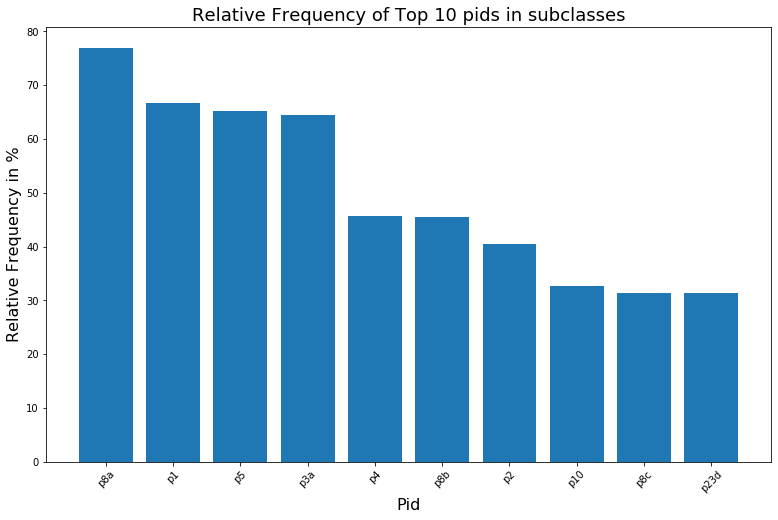

In [33]:
# visualize relative occurrence of pids in subclasses 
util_visualizations.visualize_pids(occurences_pids_subclasses, all_subclasses, 'subclasses')

# 2. Types and transitive types

In [34]:
# read in types
types = pd.read_csv('/path/to/9_FINAL/data/matches_pids/types_with_pid.csv', sep=";")
del types['Unnamed: 0']
types.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,1988,album,4,2,4,89520215,"['p3a', 'p5', 'p5', 'p3a']"
1,196,year,1,1,1,250210719,['p8b']
2,53,year,2,1,1,333976287,['p8b']
3,2007,year,104,6,57,179643001,"['p25p8ap8b', 'p8b', 'p8b', 'p25', 'p8b', 'p8b..."
4,2,aircraft,21,4,16,472381603,"['p8b', 'p8b', 'p8b', 'p3a', 'p8b', 'p5', 'p8b..."


In [35]:
# get shape
types.shape # 20,745 which is correct

(20745, 7)

In [36]:
# get all unique pids in types
unique_pids_types_pure = util_pids.get_all_different_pids(types, 'pids')
len(unique_pids_types_pure)

58

In [37]:
# append number of occurrences as new column to types dataframe
pure_types_with_pids = util_pids.append_pids_to_data(types, unique_pids_types_pure, 'pids')

In [38]:
# get occurrences of pids as dataframe 
occurences_pids_types_pure = util_pids.get_occurence_pids(pure_types_with_pids, 'pids')
occurences_pids_types_pure.sort_values(by='occurrence', ascending=False).head()

,pid,occurrence
54,p8a,14422
51,p5,9251
47,p3a,6344
0,p1,5363
55,p8b,3994


In [39]:
# read in transitive subclasses
t_types = pd.read_csv('/path/to/9_FINAL/data/matches_pids/transitive-types_with_pid.csv', sep=";")
del t_types['Unnamed: 0']
t_types.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,2002,season,2,2,2,303245024,"['p8b', 'p3a']"
1,44,weapon,2,2,2,107884750,"['p8a', 'p8c']"
2,55,company,1,1,1,30037411,['p8c']
3,44,device,1,1,1,107130687,['p21d']
4,2,work,126,16,72,215469565,"['p4p15ap25p8ap8cp43', 'p8ap8c', 'p8a', 'p8a',..."


In [40]:
# get shape
t_types.shape # 99,588 which is correct

(99588, 7)

In [41]:
# get all unique pids in transitive types
unique_pids_types_transitive = util_pids.get_all_different_pids(t_types, 'pids')
len(unique_pids_types_transitive)

58

In [42]:
# append number of occurrences as new column to transitive types dataframe
transitive_types_with_pids = util_pids.append_pids_to_data(t_types, unique_pids_types_transitive, 'pids')

In [43]:
# get occurrences of pids as dataframe 
occurences_pids_types_transitive = util_pids.get_occurence_pids(transitive_types_with_pids, 'pids')
occurences_pids_types_transitive.sort_values(by='occurrence', ascending=False).head()

,pid,occurrence
54,p8a,64625
51,p5,40005
47,p3a,28945
0,p1,24697
55,p8b,18934


In [45]:
# stack data and reset
# column names are already the same
all_types = pd.concat([types, t_types])
all_types = all_types.reset_index()
del all_types['index']
all_types.shape # 20,745 + 99,588

(120333, 7)

In [46]:
all_types.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,1988,album,4,2,4,89520215,"['p3a', 'p5', 'p5', 'p3a']"
1,196,year,1,1,1,250210719,['p8b']
2,53,year,2,1,1,333976287,['p8b']
3,2007,year,104,6,57,179643001,"['p25p8ap8b', 'p8b', 'p8b', 'p25', 'p8b', 'p8b..."
4,2,aircraft,21,4,16,472381603,"['p8b', 'p8b', 'p8b', 'p3a', 'p8b', 'p5', 'p8b..."


In [47]:
# Remove duplicates
all_types = all_types.drop_duplicates(subset=['instance', 'class'])
all_types.shape

(120265, 7)

In [48]:
# Return array to show which instances are the same value as class
all_types = util_pids.data_without_equal_instance_class(all_types, 'instance', 'class')

all_types.shape

(118167, 7)

## 2.1 Get pids

In [51]:
# get all unique pids in types
unique_pids_types = util_pids.get_all_different_pids(all_types, 'pids')

In [52]:
len(unique_pids_types) # take unique_pids_types for machine learning dataset

58

In [53]:
# append number of occurrences as new column to types dataframe
all_types_with_pids = util_pids.append_pids_to_data(all_types, unique_pids_types, 'pids')

In [56]:
# import to avoid costly computations
all_types_with_pids = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/types_one_hot_encoded.csv',sep=";")
del all_types_with_pids['Unnamed: 0']

In [57]:
# get occurrences of pids as dataframe 
occurences_pids_types = util_pids.get_occurence_pids(all_types_with_pids, 'pids')
occurences_pids_types.head()

,pid,occurrence
0,p1,28744
1,p10,13513
2,p11,1631
3,p12a,7602
4,p12b,76


## 2.2 Visualize occurrence

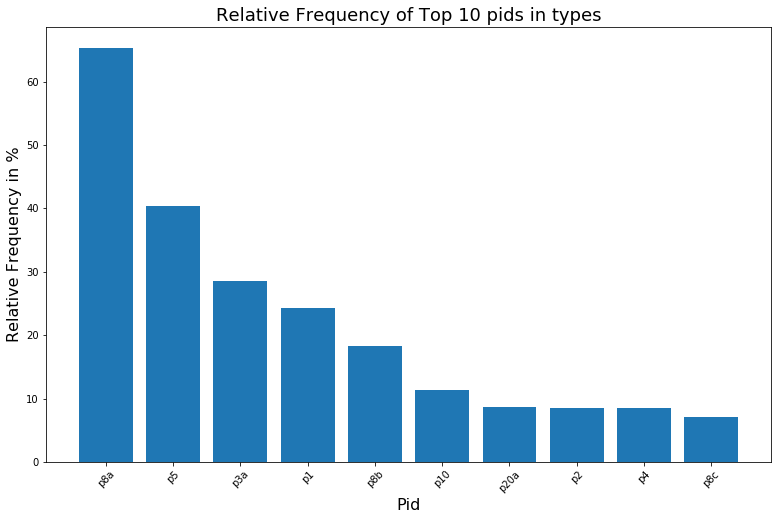

In [58]:
# visualize relative occurrence of pids in types 
util_visualizations.visualize_pids(occurences_pids_types, all_types, 'types')

# 3. Negative examples

In [59]:
# read in negative examples
negatives = pd.read_csv('/path/to/9_FINAL/data/all_negative_examples.csv', sep=";")
del negatives['Unnamed: 0']
negatives.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,1643854,1866,railway,1,1,1,['p8b']
1,1648888,1960,library,6,5,6,"['p23a', 'p12a', 'p20a', 'p8a', 'p8b', 'p8a']"
2,1673500,1960,costume,3,1,3,['p2']
3,1678428,1975,epithet,1,1,1,['p5']
4,1678435,2000,habitat,1,1,1,['p8b']


In [60]:
# Sanity check
negatives.shape # (6843800, 7) check

(6843800, 7)

In [61]:
# delete same observations for instance and class
negatives = util_pids.data_without_equal_instance_class(negatives, 'instance', 'class')

negatives.shape

(6842160, 7)

In [62]:
# kernel died because size too big -> chop into two negatives
negatives_1 = negatives.iloc[:int(len(negatives)/6)]
negatives_1

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,1643854,1866,railway,1,1,1,['p8b']
1,1648888,1960,library,6,5,6,"['p23a', 'p12a', 'p20a', 'p8a', 'p8b', 'p8a']"
2,1673500,1960,costume,3,1,3,['p2']
3,1678428,1975,epithet,1,1,1,['p5']
4,1678435,2000,habitat,1,1,1,['p8b']
...,...,...,...,...,...,...,...
1140355,422356491,canal+,territory,1,1,1,['p3a']
1140356,422363233,carbon,lubricant,14,2,8,"['p5', 'p5', 'p8a', 'p5', 'p8a', 'p5', 'p8a', ..."
1140357,422370617,casino,franchise,6,3,6,"['p23d', 'p5', 'p1', 'p5']"
1140358,422373631,canada,statement,44,15,39,"['p36p5p21dp8ap28b', 'p8a', 'p23c', 'p3a', 'p3..."


In [63]:
negatives_2 = negatives.iloc[int(len(negatives)/6):(2*int(len(negatives)/6))]
negatives_2

,_id,instance,class,frequency,pidspread,pldspread,modifications
1140360,422376502,cattle,commodity,118,22,97,"['p6p26p5p14p23dp1p10p8dp20dp3a', 'p5p4p1p8cp3..."
1140361,422377655,cannon,submarine,2,1,2,['p5']
1140362,422379637,carmen,celebrity,4,3,4,"['p8a', 'p8a', 'p3a', 'p5']"
1140363,422380416,canvas,community,11,3,11,"['p8ap28b', 'p8a', 'p8a', 'p8a', 'p8a', 'p3a',..."
1140364,422380723,canada,methodist,1,1,1,['p34']
...,...,...,...,...,...,...,...
2280715,391043046,franke,number,2,1,2,"['p3a', 'p3a']"
2280716,391046642,friday,sermon,5,2,5,"['p8a', 'p3a', 'p8a', 'p8a', 'p8a']"
2280717,391048094,franks,attack,1,1,1,['p8b']
2280718,391050273,france,sandal,1,1,1,['p20d']


In [64]:
negatives_3 = negatives.iloc[2*int(len(negatives)/6):(3*int(len(negatives)/6))]
negatives_3

,_id,instance,class,frequency,pidspread,pldspread,modifications
2280720,391090745,friend,season,130,18,102,"['p21ap26p2p25p23ap12ap8ap20ap8bp3a', 'p23dp2p..."
2280721,391100690,frieri,season,1,1,1,['p5']
2280722,391123261,france,county,51,10,47,"['p7p5p2p1p10p8ap3a', 'p1', 'p5p23d', 'p1', 'p..."
2280723,391156102,friend,seabee,2,2,2,"['p8a', 'p8b']"
2280724,391158615,france,cousin,14,6,13,"['p2p8ap8b', 'p8ap8c', 'p8a', 'p8b', 'p3a', 'p..."
...,...,...,...,...,...,...,...
3421075,121816493,lesser,decoy,1,1,1,['p8c']
3421076,121817138,legacy,angel,4,4,4,"['p28b', 'p8a', 'p3a', 'p2']"
3421077,121819464,levine,flute,1,1,1,['p5']
3421078,121831074,lentil,berry,2,2,2,"['p2', 'p34']"


In [65]:
negatives_4 = negatives.iloc[3*int(len(negatives)/6):(4*int(len(negatives)/6))]
negatives_4

,_id,instance,class,frequency,pidspread,pldspread,modifications
3421080,121834702,letter,baker,10,3,3,"['p23bp3a', 'p8a']"
3421081,121836655,length,mouse,8,5,8,"['p25', 'p21a', 'p21b', 'p21a', 'p25', 'p5', '..."
3421082,121837462,length,movie,50,15,42,"['p26p2p23b', 'p3a', 'p21d', 'p21b', 'p3a', 'p..."
3421083,121837670,letter,barge,1,1,1,['p5']
3421084,121842213,length,watch,29,5,28,"['p3a', 'p3a', 'p8a', 'p5', 'p23a', 'p3a', 'p3..."
...,...,...,...,...,...,...,...
4561435,133479860,pesticide,enzyme,1,1,1,['p3a']
4561436,133500174,perpignan,editor,1,1,1,['p8a']
4561437,133503263,perimeter,sensor,5,3,2,"['p3a', 'p25', 'p3a', 'p5']"
4561438,133504568,penstemon,garden,4,2,4,"['p8a', 'p3a', 'p8a', 'p8a']"


In [66]:
negatives_5 = negatives.iloc[4*int(len(negatives)/6):(5*int(len(negatives)/6))]
negatives_5

,_id,instance,class,frequency,pidspread,pldspread,modifications
4561440,133508822,petroform,animal,1,1,1,['p4']
4561441,133523833,pellistor,device,2,2,2,"['p8a', 'p5']"
4561442,133538591,pesticide,fabric,2,2,2,['p20ap3a']
4561443,133545057,peristyle,palace,1,1,1,['p3a']
4561444,133555589,pendennis,member,1,1,1,['p3a']
...,...,...,...,...,...,...,...
5701795,232040519,sox,rupture,1,1,1,['p8a']
5701796,232052413,sox,dessert,1,1,1,['p8b']
5701797,232083445,son,atheist,106,3,62,"['p8ap8b', 'p8a', 'p8a', 'p8a', 'p8a', 'p8a', ..."
5701798,232093664,son,product,167,21,129,"['p5p2p24p8ap8cp8b', 'p8ap8c', 'p8ap8b', 'p8d'..."


In [67]:
negatives_6 = negatives.iloc[(5*int(len(negatives)/6)):]
negatives_6

,_id,instance,class,frequency,pidspread,pldspread,modifications
5701800,232110591,sos,village,1,1,1,['p3a']
5701801,232132857,son,auction,1,1,1,['p8a']
5701802,232134832,sos,product,11,3,9,"['p8a', 'p8a', 'p8a', 'p3a', 'p8a', 'p5', 'p8a..."
5701803,232137191,son,dentist,75,5,51,"['p26p8ap8bp43', 'p8ap8b', 'p8b', 'p8b', 'p8a'..."
5701804,232140036,son,uniform,5,3,5,"['p3a', 'p2', 'p2', 'p43', 'p2']"
...,...,...,...,...,...,...,...
6842155,467302079,zzz,model,1,1,1,['p5']
6842156,467609399,zzz,datum,1,1,1,['p21a']
6842157,468882452,zzz,skill,2,1,1,['p8a']
6842158,470608021,zzz,sound,1,1,1,['p8b']


In [68]:
len(negatives_1)+len(negatives_2)+len(negatives_3)+len(negatives_4)+len(negatives_5)+len(negatives_6)

6842160

## 3.1 Get pids

## 3.1.1 Loop through 6 negatives

In [69]:
# append number of occurrences as new column to negatives dataframe
counter = 1

for element in [negatives_1, negatives_2, negatives_3, negatives_4, negatives_5, negatives_6]:
    negative_with_pid = util_pids.append_pids_to_data(element, unique_pids_types, 'modifications')
    print('Done with {}'.format(counter))
    
    filename = str(counter) + '_one_hot_encoded.csv'
    negative_with_pid.to_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_'+filename, sep=";")
    counter += 1

Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6


## 3.1.2 Get single negatives

In [70]:
# get negative 1 and 2
negative_1 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_1_one_hot_encoded.csv', sep=";")
del negative_1['Unnamed: 0']
negative_2 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_2_one_hot_encoded.csv', sep=";")
del negative_2['Unnamed: 0']

In [71]:
# get 3 and 4
negative_3 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_3_one_hot_encoded.csv', sep=";")
del negative_3['Unnamed: 0']
negative_4 = pd.read_csv('path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_4_one_hot_encoded.csv', sep=";")
del negative_4['Unnamed: 0']

In [72]:
# get 5 and 6
negative_5 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_5_one_hot_encoded.csv', sep=";")
del negative_5['Unnamed: 0']
negative_6 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_6_one_hot_encoded.csv', sep=";")
del negative_6['Unnamed: 0']

In [73]:
negative_6.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,232110591,sos,village,1,1,1,['p3a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,232132857,son,auction,1,1,1,['p8a'],0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,232134832,sos,product,11,3,9,"['p8a', 'p8a', 'p8a', 'p3a', 'p8a', 'p5', 'p8a...",0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,232137191,son,dentist,75,5,51,"['p26p8ap8bp43', 'p8ap8b', 'p8b', 'p8b', 'p8a'...",0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,232140036,son,uniform,5,3,5,"['p3a', 'p2', 'p2', 'p43', 'p2']",0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 3.1.3 Get single occurrences

In [74]:
# get occurrences of pids as dataframe 
occurences_pids_negatives_1 = util_pids.get_occurence_pids(negative_1, 'modifications')
occurences_pids_negatives_1 = occurences_pids_negatives_1.set_index(['pid'])
occurences_pids_negatives_1.head()

,occurrence
pid,
p1,158883
p10,39400
p11,6212
p12a,45209
p12b,825


In [75]:
# get occurrences of pids as dataframe 
occurences_pids_negatives_2 = util_pids.get_occurence_pids(negative_2, 'modifications')
occurences_pids_negatives_2 = occurences_pids_negatives_2.set_index(['pid'])
occurences_pids_negatives_2.head()

,occurrence
pid,
p1,171600
p10,41432
p11,7749
p12a,48887
p12b,1114


In [80]:
# get occurrences of pids as dataframe 
occurences_pids_negatives_3 = util_pids.get_occurence_pids(negative_3, 'modifications')
occurences_pids_negatives_3 = occurences_pids_negatives_3.set_index(['pid'])
occurences_pids_negatives_3.head()

,occurrence
pid,
p1,153175
p10,39765
p11,6600
p12a,47166
p12b,1106


In [76]:
# get occurrences of pids as dataframe 
occurences_pids_negatives_4 = util_pids.get_occurence_pids(negative_4, 'modifications')
occurences_pids_negatives_4 = occurences_pids_negatives_4.set_index(['pid'])
occurences_pids_negatives_4.head()

,occurrence
pid,
p1,159136
p10,40719
p11,7418
p12a,48795
p12b,1107


In [77]:
# get occurrences of pids as dataframe 
occurences_pids_negatives_5 = util_pids.get_occurence_pids(negative_5, 'modifications')
occurences_pids_negatives_5 = occurences_pids_negatives_5.set_index(['pid'])
occurences_pids_negatives_5.head()

,occurrence
pid,
p1,167747
p10,40710
p11,7354
p12a,44951
p12b,875


In [78]:
# get occurrences of pids as dataframe 
occurences_pids_negatives_6 = util_pids.get_occurence_pids(negative_6, 'modifications')
occurences_pids_negatives_6 = occurences_pids_negatives_6.set_index(['pid'])
occurences_pids_negatives_6.head()

,occurrence
pid,
p1,169154
p10,40728
p11,8603
p12a,49788
p12b,1297


In [81]:
# count all occurrences together
occurences_pids_negatives = occurences_pids_negatives_1 + occurences_pids_negatives_2 + occurences_pids_negatives_3 + occurences_pids_negatives_4 + occurences_pids_negatives_5 + occurences_pids_negatives_6
occurences_pids_negatives = occurences_pids_negatives.reset_index()
occurences_pids_negatives.head()

,pid,occurrence
0,p1,979695
1,p10,242754
2,p11,43936
3,p12a,284796
4,p12b,6324


In [82]:
# export for future uses
occurences_pids_negatives.to_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/occurences_pids_negatives.csv', sep=";")

## 3.2 Visualize occurrence

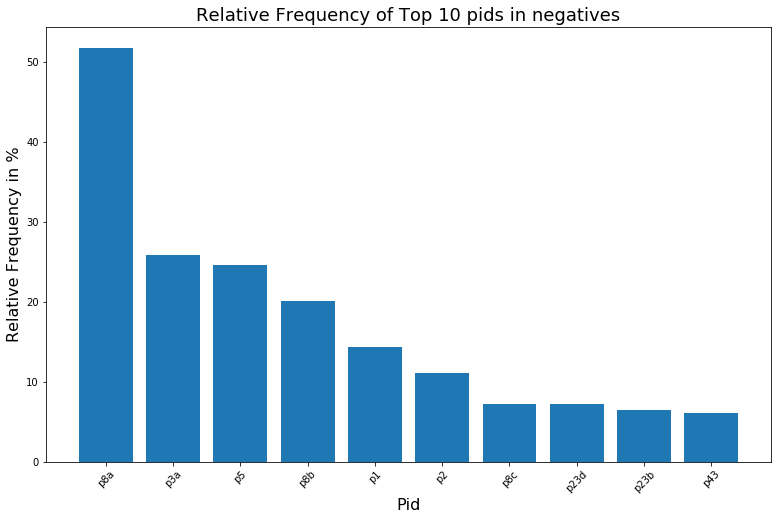

In [83]:
# visualize relative occurrence of pids in types 
util_visualizations.visualize_pids(occurences_pids_negatives, negatives, 'negatives')

# 4. Show chart for all three classes: subclasses, types and negative examples

Get the occurrence chart for all three classes

In [84]:
# get relative frequencies, sort data descending and take top 10 observations
## subclasses
occurences_pids_subclasses_top10 = occurences_pids_subclasses.copy()
occurences_pids_subclasses_top10['Relative Frequency'] = occurences_pids_subclasses_top10['occurrence']/len(all_subclasses)*100
occurences_pids_subclasses_top10 = occurences_pids_subclasses_top10.sort_values(by='occurrence', ascending=False)
occurences_pids_subclasses_top10 = occurences_pids_subclasses_top10.head(10)

## types
occurences_pids_types_top10 = occurences_pids_types.copy()
occurences_pids_types_top10['Relative Frequency'] = occurences_pids_types_top10['occurrence']/len(all_types)*100
occurences_pids_types_top10 = occurences_pids_types_top10.sort_values(by='occurrence', ascending=False)
occurences_pids_types_top10 = occurences_pids_types_top10.head(10)

## negatives
occurences_pids_negatives_top10 = occurences_pids_negatives.copy()
occurences_pids_negatives_top10['Relative Frequency'] = occurences_pids_negatives['occurrence']/len(negatives)*100
occurences_pids_negatives_top10 = occurences_pids_negatives_top10.sort_values(by='occurrence', ascending=False)
occurences_pids_negatives_top10 = occurences_pids_negatives_top10.head(10)

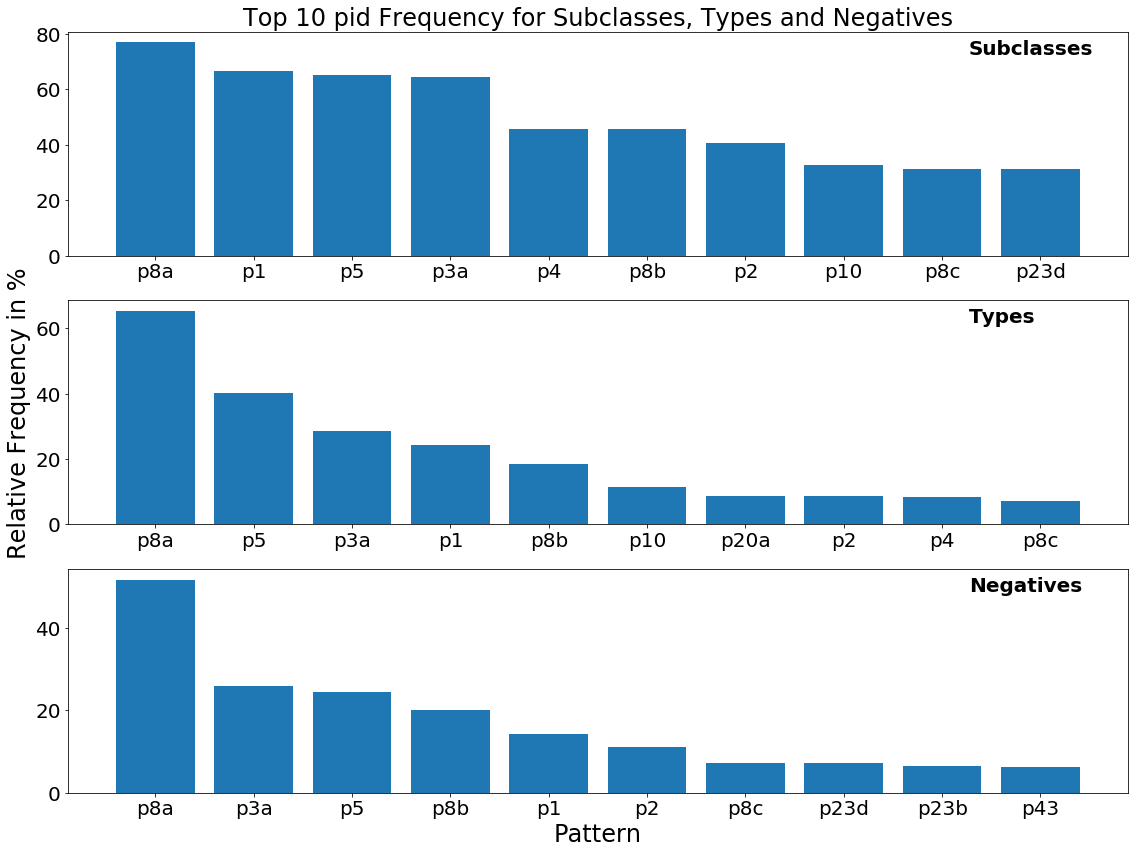

In [85]:
# show pid distribution for all three classes

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (19,14))
#fig.suptitle('Top 10 pid Frequency for Subclasses, Types and Negatives', fontsize=24)
#fig.set_xlabel('Term')

y_pos = np.arange(10) # get ticks for top 10s

## subclasses
ax1.bar(y_pos, occurences_pids_subclasses_top10['Relative Frequency'])
ax1.set_xticks(y_pos)
ax1.set_xticklabels(list(occurences_pids_subclasses_top10['pid'].values), size=16)
ax1.set_title('Top 10 pid Frequency for Subclasses, Types and Negatives',size=24)
#ax1.set_ylabel('Relative Frequency in %', fontsize=20)
ax1.annotate("Subclasses", xy=(0.85, 0.9), xycoords="axes fraction", size=20, fontweight='bold')
ax1.tick_params(labelsize=20)
#ax2.annotate("B", xy=(0.9, 0.9), xycoords="axes fraction")

## types
#y_pos = np.arange(len(objects_terms_top))
ax2.bar(y_pos, occurences_pids_types_top10['Relative Frequency'])
ax2.set_xticks(y_pos)
ax2.set_xticklabels(list(occurences_pids_types_top10['pid'].values), size=16)
ax2.set_ylabel('Relative Frequency in %', fontsize=24)
#ax2.title.set_text('Types', fontsize=18)
ax2.annotate("Types", xy=(0.85, 0.9), xycoords="axes fraction", size=20, fontweight='bold')
ax2.tick_params(labelsize=20)
#ax2.set_title('Types', size=20)

## negatives
#y_pos = np.arange(len(objects_terms_top))
ax3.bar(y_pos, occurences_pids_negatives_top10['Relative Frequency'])
ax3.set_xticks(y_pos)
ax3.set_xticklabels(list(occurences_pids_negatives_top10['pid'].values), size=16)
#ax3.set_title('Negatives', size=20)
ax3.set_xlabel('Pattern', fontsize=24)
ax3.annotate("Negatives", xy=(0.85, 0.9), xycoords="axes fraction", size=20, fontweight='bold')
ax3.tick_params(labelsize=20)
#ax3.set_ylabel('Relative Frequency in %', fontsize=18)
#plt.title('Object Term Frequency in WebIsALOD for 200 most common Objects', fontsize=14)

#plt.ylabel('Relative Frequency in %', position=(1,1.7), fontsize=20)

In [86]:
# tail of the patterns for subclasses
occurences_pids_subclasses.sort_values(by='occurrence', ascending=False).tail(10)

,pid,occurrence
36,p29a,109
43,p37,102
20,p22a,79
48,p42,39
39,p30b,26
21,p22b,19
4,p12b,17
37,p29c,15
38,p30a,8
40,p31a,5


In [87]:
# tail of the patterns for types
occurences_pids_types.sort_values(by='occurrence', ascending=False).tail(10)

,pid,occurrence
44,p37,359
36,p29a,312
39,p30b,171
49,p42,126
4,p12b,76
21,p22b,55
37,p29c,53
38,p30a,44
40,p31a,28
41,p31b,5


In [88]:
# tail of patterns for negatives
occurences_pids_negatives.sort_values(by='occurrence', ascending=False).tail(10)

,pid,occurrence
20,p22a,10651
36,p29a,8562
4,p12b,6324
39,p30b,4838
37,p29c,3525
21,p22b,2718
49,p42,2439
38,p30a,1380
40,p31a,973
41,p31b,111
